In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import nltk
from nltk.stem import PorterStemmer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True



---

##Loading Data into a pandas dataframe

In [3]:
df = pd.read_csv('Review.csv')

# Select only the 'review' and 'rating' columns
balanced_df = df[['Review', 'Rating']]

# Reset the index for neatness
balanced_df.reset_index(drop=True, inplace=True)

# Removing nan values
balanced_df.dropna(inplace=True)

# Display the first few rows of the final DataFrame
print(balanced_df.head())

                                              Review  Rating
0  I love this car.\nGas mileage, suspension, and...       5
1  I purchased my 2013 ILX from the dealer used w...       5
2  I recently purchased a 2013 ILX with the Tech ...       4
3  We bought our ILX used and have been incredibl...       4
4  In April of 2015 we were in need of another ca...       5


<ipython-input-3-ec901c8a28c5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df.dropna(inplace=True)




---

##Seeing the count and distribution of all the ratings


Class Distribution:
Rating
4    144612
5     94119
3     31785
2     17538
1     10990
0         1
Name: count, dtype: int64


<ipython-input-5-7ed8c48f3c1d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', palette='viridis')


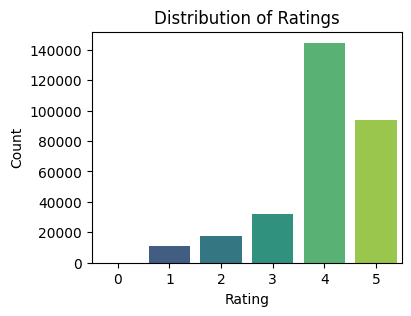

In [ ]:
# Class distribution
print("\nClass Distribution:")
print(df['Rating'].value_counts())

# Plotting the class distribution
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='Rating', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()



---
##Summary statistics of Review lengths


In [4]:
# Summary Statistics
print("\nSummary Statistics for Review Lengths by Rating:")
balanced_df['Review_length'] = balanced_df['Review'].apply(len)
print(balanced_df.groupby('Rating')['Review_length'].describe())


Summary Statistics for Review Lengths by Rating:
           count        mean         std    min    25%    50%    75%      max
Rating                                                                       
0            1.0  135.000000         NaN  135.0  135.0  135.0  135.0    135.0
1        10990.0  723.071975  662.629611    1.0  341.0  570.0  808.0   5012.0
2        17538.0  642.357224  518.082344    1.0  379.0  578.0  694.0   5957.0
3        31784.0  594.043103  479.724568    1.0  355.0  553.0  686.0   5012.0
4       144609.0  462.780187  363.413912    1.0  252.0  422.0  636.0   8339.0
5        94118.0  496.303109  562.121377    1.0  179.0  364.0  632.0  12019.0


<ipython-input-4-4b0b9cf3d58f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['Review_length'] = balanced_df['Review'].apply(len)


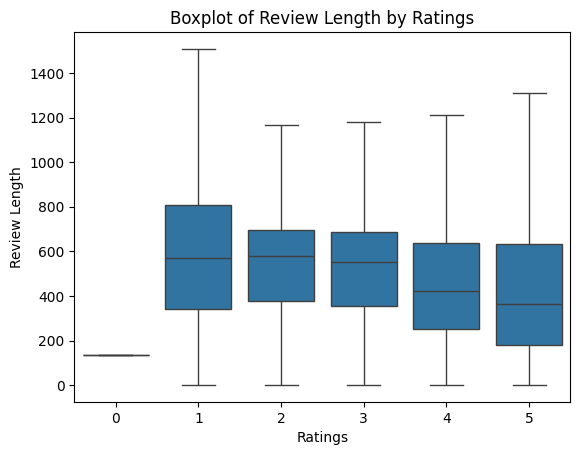

In [7]:
sns.boxplot(x='Rating', y='Review_length', data=balanced_df, showfliers = False)
plt.title('Boxplot of Review Length by Ratings')
plt.xlabel('Ratings')
plt.ylabel('Review Length')
plt.show()



---
##Text Analysis using tokenization

In [ ]:
def review_cleaner(review):
  stopwords = nltk.corpus.stopwords.words("english")
  porter = PorterStemmer()
  # Make sure the reviews are not case sensitive
  review = review.lower()
  # Tokenize the words from the review
  words = nltk.word_tokenize(review)
  # Stemming and stopwords removal
  processed_words = [porter.stem(word) for word in words if word not in stopwords]
  # Join back to a single string
  return ' '.join(processed_words)

# Tokenization and Word Frequency Analysis
# Using CountVectorizer to get word frequencies
vectorizer = CountVectorizer(preprocessor = review_cleaner, max_features =  20)  # Top 20 words
X = vectorizer.fit_transform(balanced_df['Review'])
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()

X

<299040x20 sparse matrix of type '<class 'numpy.int64'>'
	with 1486643 stored elements in Compressed Sparse Row format>

In [ ]:
# Creating a DataFrame for word frequencies
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})
print("\nTop 20 Words in All Reviews:")
print(word_freq_df.sort_values(by='count', ascending=False))


Top 20 Words in All Reviews:
       word   count
1       car  430507
3     drive  186106
6     great  131066
4       get  123414
10     mile  114100
7      like  109411
17   vehicl  100284
9      love   94833
12      one   90246
8      look   89487
15     seat   82681
19     year   80044
13  problem   77293
5      good   77292
11      new   74469
2   comfort   70331
18    would   70027
16     time   66825
14     ride   63547
0    bought   62433


In [ ]:
# Apply cleaning function to the reviews
balanced_df['cleaned_review'] = balanced_df['Review'].apply(review_cleaner)


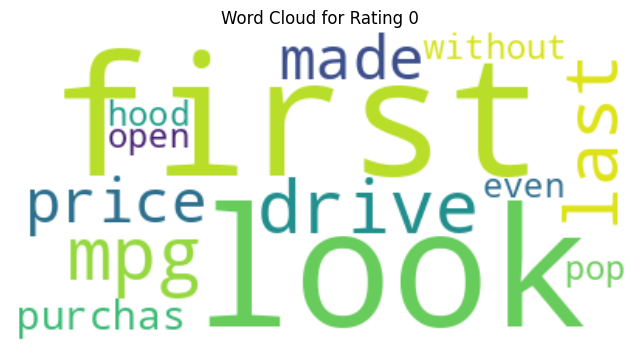

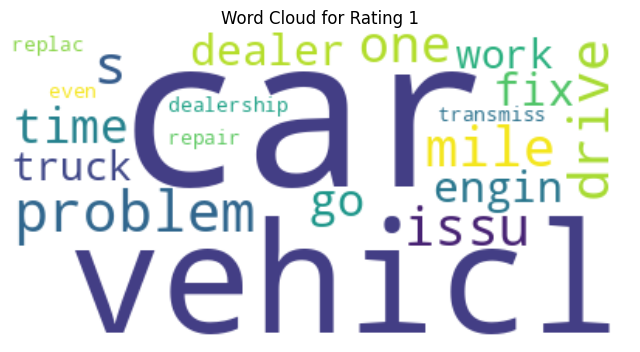

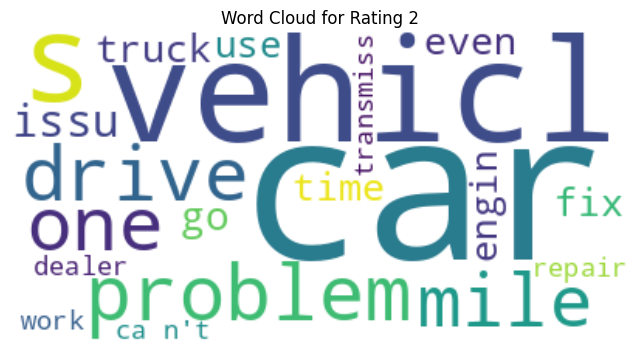

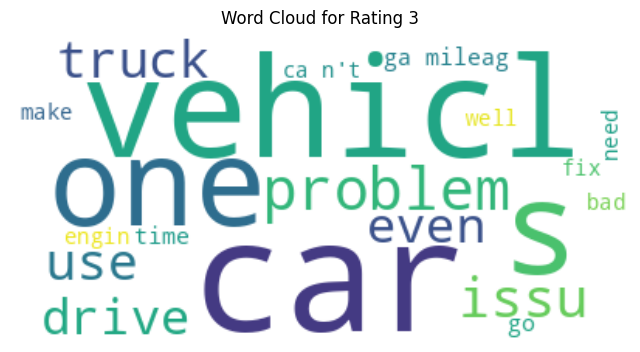

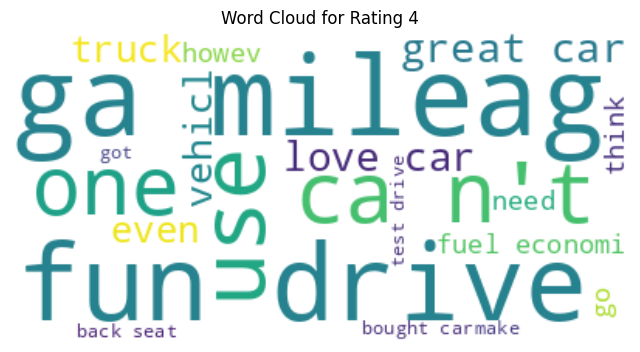

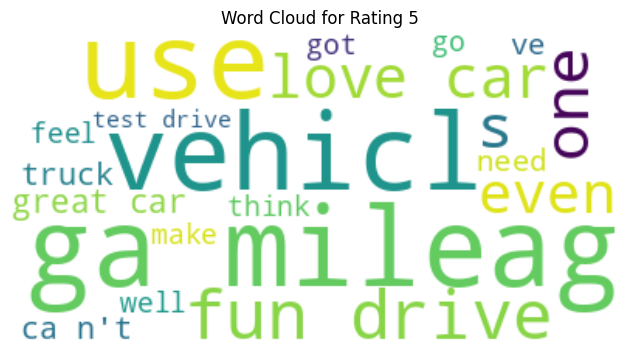

In [ ]:

# Plotting Word Cloud for each rating with the cleaned reviews
for rating in sorted(df['Rating'].unique()):
    plt.figure(figsize=(8, 6))
    text = " ".join(balanced_df[balanced_df['Rating'] == rating]['cleaned_review'])
    wordcloud = WordCloud(background_color='white', max_words=20).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.show()

<ipython-input-12-8014f2854c75>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df['polarity'] = balanced_df['Review'].apply(get_polarity)
<ipython-input-12-8014f2854c75>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=balanced_df, x='Rating', y='polarity', palette='viridis')


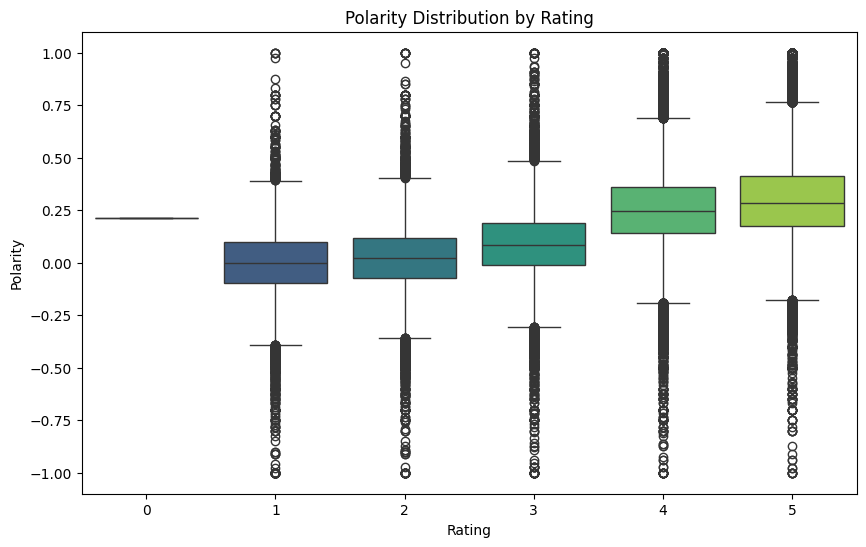


Summary Statistics of Polarity by Rating:
           count      mean       std     min       25%       50%       75%  \
Rating                                                                       
0            1.0  0.212500       NaN  0.2125  0.212500  0.212500  0.212500   
1        10990.0 -0.009699  0.194658 -1.0000 -0.097528  0.000000  0.097769   
2        17538.0  0.017398  0.178604 -1.0000 -0.073103  0.024123  0.117877   
3        31784.0  0.088286  0.178700 -1.0000 -0.010417  0.085971  0.187857   
4       144609.0  0.257260  0.188232 -1.0000  0.140000  0.246403  0.359742   
5        94118.0  0.309039  0.211539 -1.0000  0.176488  0.284645  0.412500   

           max  
Rating          
0       0.2125  
1       1.0000  
2       1.0000  
3       1.0000  
4       1.0000  
5       1.0000  


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Applying polarity function to the reviews
balanced_df['polarity'] = balanced_df['Review'].apply(get_polarity)

# Plotting Polarity Distribution per Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=balanced_df, x='Rating', y='polarity', palette='viridis')
plt.title('Polarity Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.show()


# Summary statistics of polarity by rating
print("\nSummary Statistics of Polarity by Rating:")
print(balanced_df.groupby('Rating')['polarity'].describe())